# Ground State Calculation
## Bandstructure with high-symmetry path along with Electronic Band gap

In [1]:
import matplotlib.pyplot as plt
# change defaults to make plots bigger
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 dpi is really fine, but slower (i.e. for publication)

In [2]:
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io import read
from ase.build import bulk
from ase.optimize import BFGS
from ase.optimize import BFGSLineSearch
from gpaw import GPAW, PW, FermiDirac
import matplotlib.pyplot as plt
from ase.dft.dos import DOS
from ase.constraints import UnitCellFilter
from ase.build import mx2
from gpaw import *
from ase.constraints import StrainFilter
from gpaw.xc.vdw import VDWFunctional
vdw = VDWFunctional('vdW-DF2', Nalpha=24)
'''
atoms=read('MoSMoS.traj')
calc = GPAW(mode=PW(600),
            xc='vdW-DF2',
            nbands=70,
            convergence={'bands': -20},
            setups={'Mo': '6'},      
            parallel={'band': 1, 'domain': 1},
            occupations=FermiDirac(width=0.01),
            kpts={'size': (42, 42, 1), 'gamma': True})  
atoms.calc = calc
atoms.get_potential_energy()
calc.write('gs_new.gpw', mode='all')
'''
atoms, calc=restart('../thermoelectric/gs_new.gpw')

In [3]:
# OK, sanity checks on that calculation!
# What is the band-gap, and does it look sensible?
from ase.dft.bandgap import bandgap
gap, p1, p2 = bandgap(atoms.calc)
# Output is the gap in eV
# and from where the VBM in k-space is, and where the CBM is.
# From here you can appreciate whether the material is direct or not.

Gap: 1.460 eV
Transition (v -> c):
  (s=0, k=0, n=17, [-0.00, -0.00, 0.00]) -> (s=0, k=602, n=18, [0.33, 0.33, 0.00])


MCL(a=15.4005, b=3.18375, c=3.1844, alpha=59.9981)
  Variant name: MCL
  Special point names: GACDD1EHH1H2MM1M2XYY1Z
  Default path: GYHCEM1AXH1,MDZ,YD

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    A   0.5000  0.5000  0.0000
    C   0.0000  0.5000  0.5000
    D   0.5000  0.0000  0.5000
    D1  0.5000  0.0000 -0.5000
    E   0.5000  0.5000  0.5000
    H   0.0000  0.3334  0.6667
    H1  0.0000  0.6666  0.3333
    H2  0.0000  0.3334 -0.3333
    M   0.5000  0.3334  0.6667
    M1  0.5000  0.6666  0.3333
    M2  0.5000  0.3334 -0.3333
    X   0.0000  0.5000  0.0000
    Y   0.0000  0.0000  0.5000
    Y1  0.0000  0.0000 -0.5000
    Z   0.5000  0.0000  0.0000



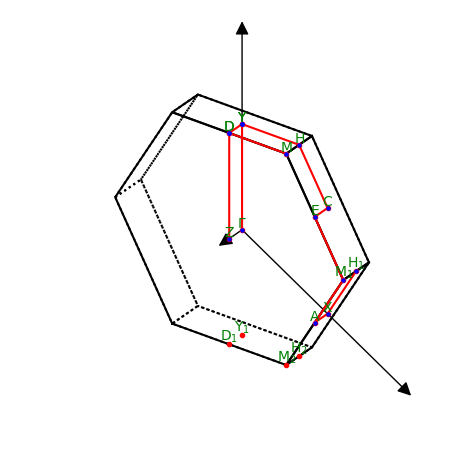

<Axes3DSubplot:>

In [4]:
# OK! Luckily ASE knows all about space groups and the reciprocal lattice.
# So let's ask it what it knows about this one, and a suggested high-symmetry path.
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.0
 |___|_|             

User:   tewodros@tewodros-HP-Pavilion-Laptop-14-bf0xx
Date:   Thu Nov 20 18:18:09 2025
Arch:   x86_64
Pid:    8335
CWD:    /home/tewodros/Desktop/Hetrostructure/HTR/revised/HTR/T1_2H/MoS2-MoS2/ground_calc
Python: 3.7.12
gpaw:   /home/tewodros/miniconda3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/tewodros/miniconda3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/tewodros/miniconda3/lib/python3.7/site-packages/ase (version 3.22.1)
numpy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/numpy (version 1.21.6)
scipy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/scipy (version 1.7.3)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: True
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: -20,
                density: 0.0001,
                eigenstates: 4e-08,
                energy: 0.0005}
  gpts

iter:  23 18:56:53  -317.427588c -5.50       c
iter:  24 18:58:18  -317.427588c -5.67       c
iter:  25 18:59:35  -317.427588c -5.83       c
iter:  26 19:00:47  -317.427588c -6.00       c
iter:  27 19:02:11  -317.427588c -6.16       c
iter:  28 19:03:33  -317.427588c -6.32       c
iter:  29 19:04:54  -317.427588c -6.48       c
iter:  30 19:06:24  -317.427588c -6.64       c
iter:  31 19:07:52  -317.427588c -6.80       c
iter:  32 19:09:16  -317.427588c -6.96       c
iter:  33 19:10:28  -317.427588c -7.11       c
iter:  34 19:11:55  -317.427588c -7.27       c
iter:  35 19:13:19  -317.427588c -7.43c      c

Converged after 35 iterations.

Dipole moment: (1.480989, -3.796025, -0.000037) |e|*Ang

Energy contributions relative to reference atoms: (reference = -263720.587655)

Kinetic:        +41.917708
Potential:      -53.619102
External:        +0.000000
XC:            -307.106399
Entropy (-ST):   -0.000000
Local:           +1.380204
--------------------------
Free energy:   -317.427588
Ext

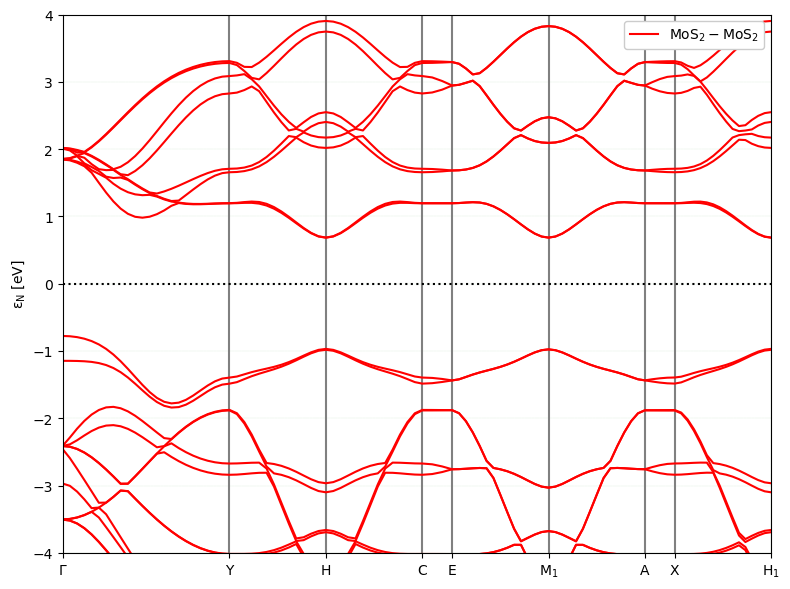

In [5]:
bs_calc = calc.fixed_density(kpts={'path': 'GYHCEM1AXH1', 'npoints': 100}, symmetry='off')
 # path through k-space taken from Materials project; or from analysis above

bs_calc.get_potential_energy() # eval at these k-point path
bs = bs_calc.band_structure().subtract_reference()
#bs=bs_calc.band_structure() # generate the plot object
#bs.ylabel(r'$\varepsilon_N(k)$ [eV]', size=24)
bs.plot(ylabel=r'$\mathrm{\varepsilon_N}$ [eV]', label=r'$\mathrm{MoS_{2}-MoS_{2}}$', loc="upper right", color='r', emax=4, emin=-4)
plt.grid(which='major', axis='both', zorder=-1.0, color = 'green', linestyle = '--', linewidth = 0.05)
plt.tight_layout()
#plt.savefig('MoS2-MoS2.eps')
plt.show()

In [8]:
# Get the accurate HOMO and LUMO from the band structure calculator
KS_gap, p1, p2 = bandgap(bs_calc)
#KS_gap, homo, lumo = bs_calc.get_homo_lumo()

Gap: 1.460 eV
Transition (v -> c):
  (s=0, k=0, n=17, [0.00, 0.00, 0.00]) -> (s=0, k=36, n=18, [0.33, 0.33, 0.00])


In [7]:
KS_gap

1.4601821306092022